### MP2 Term Paper

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#MODEL

In [3]:
df2=pd.read_excel()
df2.head()

,Pressure,AFR,Orifice,Focsuing tube dia,STD,MRR
0,3400,0.55,0.33,0.99,3,897.80
1,3600,0.55,0.33,0.99,1,1000.03
2,3600,0.55,0.30,1.05,2,961.93
3,3600,0.55,0.33,0.90,3,918.21
4,3800,0.55,0.33,0.90,2,1043.96


In [4]:
X=df2.drop(columns=['MRR'])
y=df2['MRR']

In [5]:
X.head()

,Pressure,AFR,Orifice,Focsuing tube dia,STD
0,3400,0.55,0.33,0.99,3
1,3600,0.55,0.33,0.99,1
2,3600,0.55,0.30,1.05,2
3,3600,0.55,0.33,0.90,3
4,3800,0.55,0.33,0.90,2


In [6]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test= train_test_split(X,y, train_size = 0.7, test_size = 0.3)

reg=LinearRegression()
reg.fit(X_train,y_train)

y_pred_linear = reg.predict(X_test)
mape = np.mean((np.array(abs(y_test - y_pred_linear))/np.array(y_test)))*100
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_linear))
rmse,mape

(28.814218188668423, 2.498081915815343)

In [7]:
reg.predict([[3600,0.55,0.33,0.9,3]])

array([924.91280808])

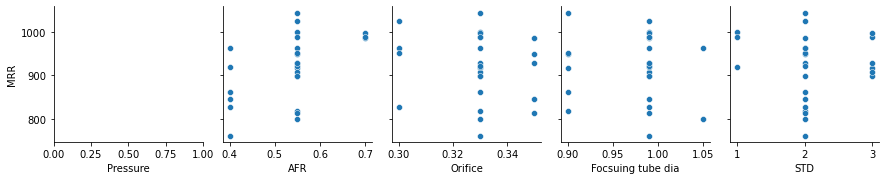

In [8]:
import seaborn as sns
pp = sns.pairplot(data=df2,y_vars=['MRR'],x_vars=['Pressure','AFR','Orifice','Focsuing tube dia','STD'])

In [9]:
#fitting Mulivariate Polynomial 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import linear_model
deg=[2,3,4,5,6,7]
rmse_poly=np.zeros(len(deg))
mape_poly=np.zeros(len(deg))
for i in range(len(deg)):
    poly = PolynomialFeatures(degree=deg[i])
    poly_variables = poly.fit_transform(X)
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables,y,test_size=0.3)
    regression = linear_model.LinearRegression()
    model = regression.fit(poly_var_train, res_train)
    y_pred = regression.predict(poly_var_test)
    
    mape_poly[i] = np.mean((np.array(abs(res_test - y_pred))/np.array(res_test)))*100
    rmse_poly[i] = np.sqrt(metrics.mean_squared_error(res_test,y_pred))
mape_poly=list(mape_poly)
rmse_poly=list(rmse_poly)
mape_poly,rmse_poly

([4.262884906239675,
  7.6912015519880725,
  12.47354019707104,
  10.84689558278936,
  13.466305701511303,
  10.758045454600438],
 [47.46563301132759,
  100.3851334702627,
  201.82635537726787,
  116.80802759771298,
  168.45252248365315,
  119.73173433441525])

In [10]:
#Best model
poly_best = PolynomialFeatures(degree=deg[mape_poly.index(min(mape_poly))])
poly_variables = poly_best.fit_transform(X)
poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables,y, test_size = 0.3)
regression = linear_model.LinearRegression()
model = regression.fit(poly_var_train, res_train)
deg[mape_poly.index(min(mape_poly))]

2

In [11]:
model.predict(poly_best.fit_transform([[3600,0.55,0.33,0.9,3]]))

array([918.21000001])

In [12]:
model.coef_

array([ 8.62320220e-04,  7.20039166e+00,  5.64201282e+03,  2.91227912e+03,
       -5.86858142e+03, -5.75970575e+02, -3.68053199e-04, -1.65573627e+00,
       -3.11129964e+00, -1.20944934e+00, -4.79610199e-01,  3.59029275e+02,
       -5.48767691e+03,  2.35787290e+03, -1.42675197e+01,  6.08978675e+03,
       -4.40612819e+03,  5.63448794e+03,  5.04288553e+03,  2.44690311e+02,
        4.06800000e+01])

In [13]:
#ANN
import keras
model= keras.Sequential()
model.add(keras.layers.Dense(5,activation='relu',input_shape=(5,)))
model.add(keras.layers.Dense(6,activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [14]:
history=model.fit(X,y,epochs=500,validation_split=0.33,callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Train on 17 samples, validate on 9 samples
Epoch 1/500
17/17 [==============================] - 0s 6ms/step - loss: 4559713.5000 - accuracy: 0.0000e+00 - val_loss: 4409118.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
17/17 [==============================] - 0s 120us/step - loss: 4504501.5000 - accuracy: 0.0000e+00 - val_loss: 4354905.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
17/17 [==============================] - 0s 176us/step - loss: 4449861.0000 - accuracy: 0.0000e+00 - val_loss: 4301269.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
17/17 [==============================] - 0s 235us/step - loss: 4395796.0000 - accuracy: 0.0000e+00 - val_loss: 4248214.0000 - val_accuracy: 0.0000e+00
Epoch 5/500
17/17 [==============================] - 0s 236us/step - loss: 4342313.5000 - accuracy: 0.0000e+00 - val_loss: 4195745.5000 - val_accuracy: 0.0000e+00
Epoch 6/500
17/17 [==============================] - 0s 233us/step - loss: 4289417.5000 - accuracy: 0.0000e+00 - val_loss: 4143865.2500 - val_a

In [15]:
test_data=np.array([3600,0.55,0.33,0.9,3])
model.predict(test_data.reshape(1,5),batch_size=1)

array([[905.8831]], dtype=float32)

In [16]:
test_data=np.array([3800,0.4,0.33,0.9,3])
model.predict(test_data.reshape(1,5),batch_size=1)

array([[956.1766]], dtype=float32)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


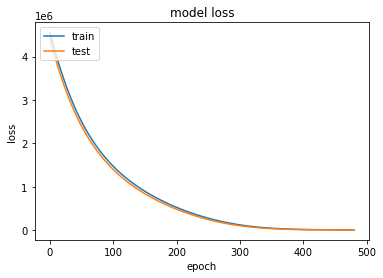

In [21]:
from keras.callbacks import History 
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
